<a href="https://colab.research.google.com/github/aimanazir/CDCbirths/blob/main/data_CDCbirths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

link = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
df = pd.DataFrame(link)

In [ ]:
df.head()   #see the header of our data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [ ]:
df.columns

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [ ]:
total_year = df.year.unique() #check lens for years available in data frame
len(total_year)

40

In [ ]:
x = df.groupby(by=['year','month']).sum()
y = df.groupby(by=['gender','year']).sum()

In [ ]:
births_year = x.drop(labels=['day'],axis=1)
#births_year.to_csv('births_year.csv')
births_year

births
year month        
1969 1      293940
     2      270786
     3      296550
     4      282638
     5      289124
...            ...
2008 8      374028
     9      368660
     10     358533
     11     324407
     12     354450

[480 rows x 1 columns]

In [ ]:
df.iloc[0:100,0:5]

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
95,1969,2,16.0,M,4416
96,1969,2,17.0,F,4768
97,1969,2,17.0,M,5054
98,1969,2,18.0,F,4962


In [ ]:
gender_births = y.drop(labels=['month','day'],axis=1)
#gender_births.to_csv('gender_birth.csv')
gender_births

births
gender year         
F      1969  1753634
       1970  1819164
       1971  1736774
       1972  1592347
       1973  1533102
...              ...
M      2004  2108197
       2005  2122727
       2006  2188268
       2007  2212118
       2008  2177227

[80 rows x 1 columns]

In [ ]:
total_birth_by_year = df.groupby('year')['births'].sum()
total_birth_by_year

year
1969    3600206
1970    3737800
1971    3563548
1972    3266235
1973    3146125
1974    3170631
1975    3153556
1976    3176476
1977    3332159
1978    3338300
1979    3499795
1980    3617981
1981    3635515
1982    3685457
1983    3642821
1984    3673568
1985    3765064
1986    3760695
1987    3813216
1988    3913793
1989    4045693
1990    4162917
1991    4115342
1992    4069428
1993    4004523
1994    3956925
1995    3903012
1996    3894874
1997    3884329
1998    3945192
1999    3963465
2000    4063823
2001    4031531
2002    4027376
2003    4096092
2004    4118907
2005    4145619
2006    4273225
2007    4324008
2008    4255156
Name: births, dtype: int64

Text(0.5, 1.0, 'Graph of total births in USA from 1969 to 2008')

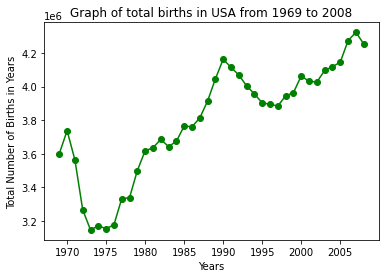

In [ ]:
%matplotlib inline
plt.plot(total_birth_by_year,'-og')
plt.xlabel('Years')
plt.ylabel('Total Number of Births in Years')
plt.title('Graph of total births in USA from 1969 to 2008')

In [ ]:
Compare_male_female = df.groupby(['gender','year'])['births'].sum()
Compare_male_female

gender  year
F       1969    1753634
        1970    1819164
        1971    1736774
        1972    1592347
        1973    1533102
                 ...   
M       2004    2108197
        2005    2122727
        2006    2188268
        2007    2212118
        2008    2177227
Name: births, Length: 80, dtype: int64

In [ ]:
Compare_male_female.iloc[39]

2077929

In [ ]:
Compare_male_female[40]

1846572

In [ ]:
import numpy as np
female = []
year = []
male = []
for i in np.arange(1969,2009,1):
  year.append(i)

for i in range(0,40):
  female.append(Compare_male_female[i])

for i in np.arange(40,):
  male.append(Compare_male_female[i]) 

In [ ]:
len(female) #check lens for data list

40

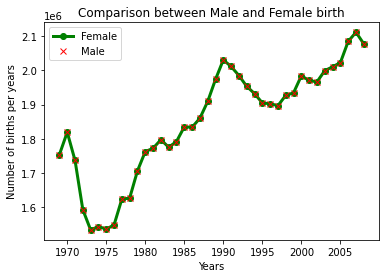

In [ ]:
plt.plot(year,female,'-og',linewidth=3,label='Female')
plt.plot(year,male,'xr',linewidth=0.5,label='Male')
plt.xlabel('Years')
plt.ylabel('Number of births per years')
plt.title('Comparison between Male and Female birth')
plt.legend(loc='upper left')
